In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Understanding the Data

In [6]:
house_price = pd.read_csv(r"D:\Upgrad\Advance Regression\train.csv", sep=",", header=0)
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
# shape of df
house_price.shape

(1460, 81)

In [8]:
# basics of the df
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Dropping the column 'Id' from the dataframe.
house_price.drop('Id', axis =1, inplace =True)

## EDA with missing values treatment

In [10]:
# missing values
round(100*(house_price.isnull().sum())/len(house_price), 2).sort_values(ascending = False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
MSSubClass       0.00
dtype: float64

#### Removing the columns with high missing values 

In [11]:
# Dropping the columns with missing values > 40%
house_price = house_price.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis=1)
house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...          61             0         0   
1    AllPub       FR2       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...          42             0         0   
3    AllPub    Corner       Gtl  ...          35           272         0   
4    AllPub       FR2       Gtl  ...          84             0         0   

  ScreenPorch PoolArea  MiscVal  YrSold  SaleType  SaleCondition SalePrice  
0           0        0        0    2008        WD         Normal    208500  
1           0        0        0    2007        WD         Normal    181500  
2           0        0        0    2008        WD         Normal    223500  
3           0        0        0    2006        WD        Abnorml    140000  
4           0        0        0    2008        WD         Normal    250000  

[5 rows x 74 columns]

In [12]:
# missing values > 0.00%
round(100*(house_price.isnull().sum())/len(house_price), 2)[round(100*(house_price.isnull().sum())/len(house_price), 2)>0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [13]:
# Columns - GarageType, GarageFinish, GarageQual, GarageCond are having meaningful missing values 
# i.e. are 'nan' because of 'no garage'
Garage_col = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col_g in Garage_col:
    house_price[col_g].fillna('no garage', inplace = True)

# Columns - BsmtExposure, BsmtFinType2, BsmtQual, BsmtFinType1, BsmtCond are having meaningful missing values 
# i.e. are 'nan' because of 'no basement'
Basement_col = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
for col_b in Basement_col:
    house_price[col_b].fillna('no basement', inplace = True)

In [14]:
# Column - MasVnrType is having missing value because of 'no masonry'
house_price["MasVnrType"].fillna('no masonry', inplace = True)

In [15]:
# missing values > 0.00%
round(100*(house_price.isnull().sum())/len(house_price), 2)[round(100*(house_price.isnull().sum())/len(house_price), 2)>0]

LotFrontage    17.74
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [16]:
house_price.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

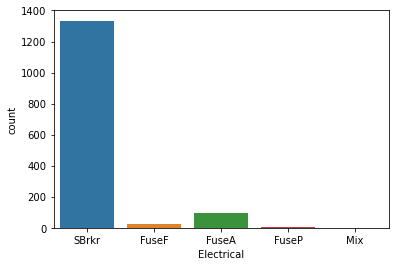

In [17]:
sns.countplot(house_price.Electrical)
plt.show()

#### Replacing 'NaN' values of Electrical column with the mode.

In [18]:
house_price.Electrical.fillna(house_price.Electrical.mode()[0], inplace= True)

In [19]:
# missing values > 0.00%
round(100*(house_price.isnull().sum())/len(house_price), 2)[round(100*(house_price.isnull().sum())/len(house_price), 2)>0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

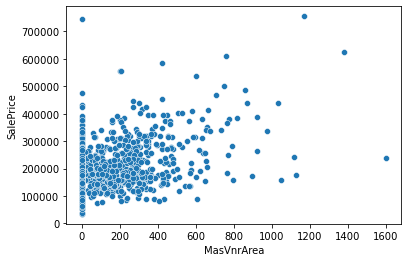

In [20]:
sns.scatterplot(data=house_price, x="MasVnrArea", y="SalePrice")
plt.show()

In [21]:
house_price.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

#### Replacing 'NaN' values of MasVnrArea column with the mean.

In [22]:
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(), inplace= True)

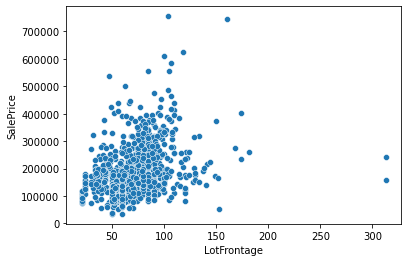

In [23]:
sns.scatterplot(data=house_price, x="LotFrontage", y="SalePrice")
plt.show()

In [24]:
house_price.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Replacing 'NaN' values of LotFrontage column with the median.

In [25]:
house_price.LotFrontage.fillna(house_price.LotFrontage.median(), inplace= True)

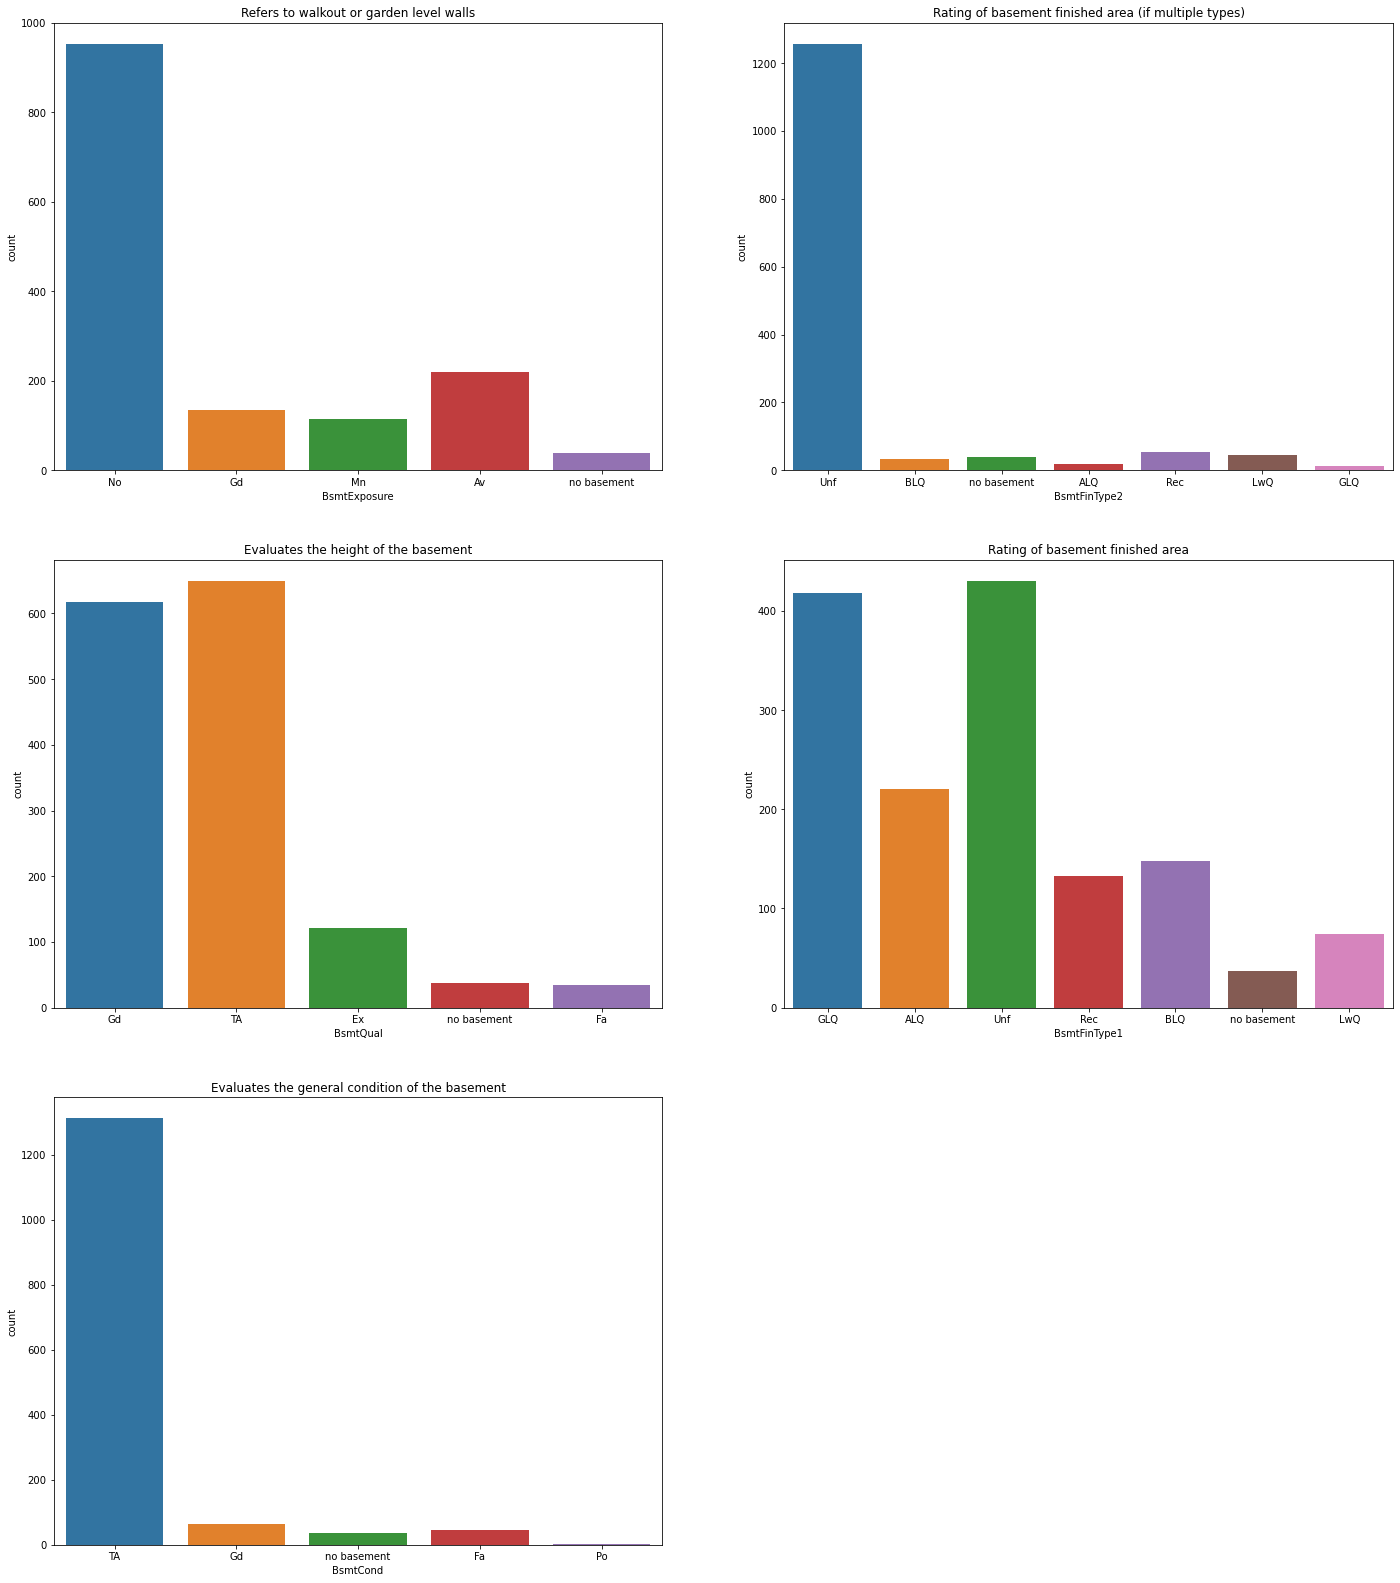

In [26]:
# EDA for some categorical variables
plt.figure(figsize = (24,28))

plt.subplot(3,2,1)
sns.countplot(house_price['BsmtExposure'])
plt.title('Refers to walkout or garden level walls')

plt.subplot(3,2,2)
sns.countplot(house_price['BsmtFinType2'])
plt.title('Rating of basement finished area (if multiple types)')

plt.subplot(3,2,3)
sns.countplot(house_price['BsmtQual'])
plt.title('Evaluates the height of the basement')

plt.subplot(3,2,4)
sns.countplot(house_price['BsmtFinType1'])
plt.title('Rating of basement finished area')

plt.subplot(3,2,5)
sns.countplot(house_price['BsmtCond'])
plt.title('Evaluates the general condition of the basement')

plt.show()

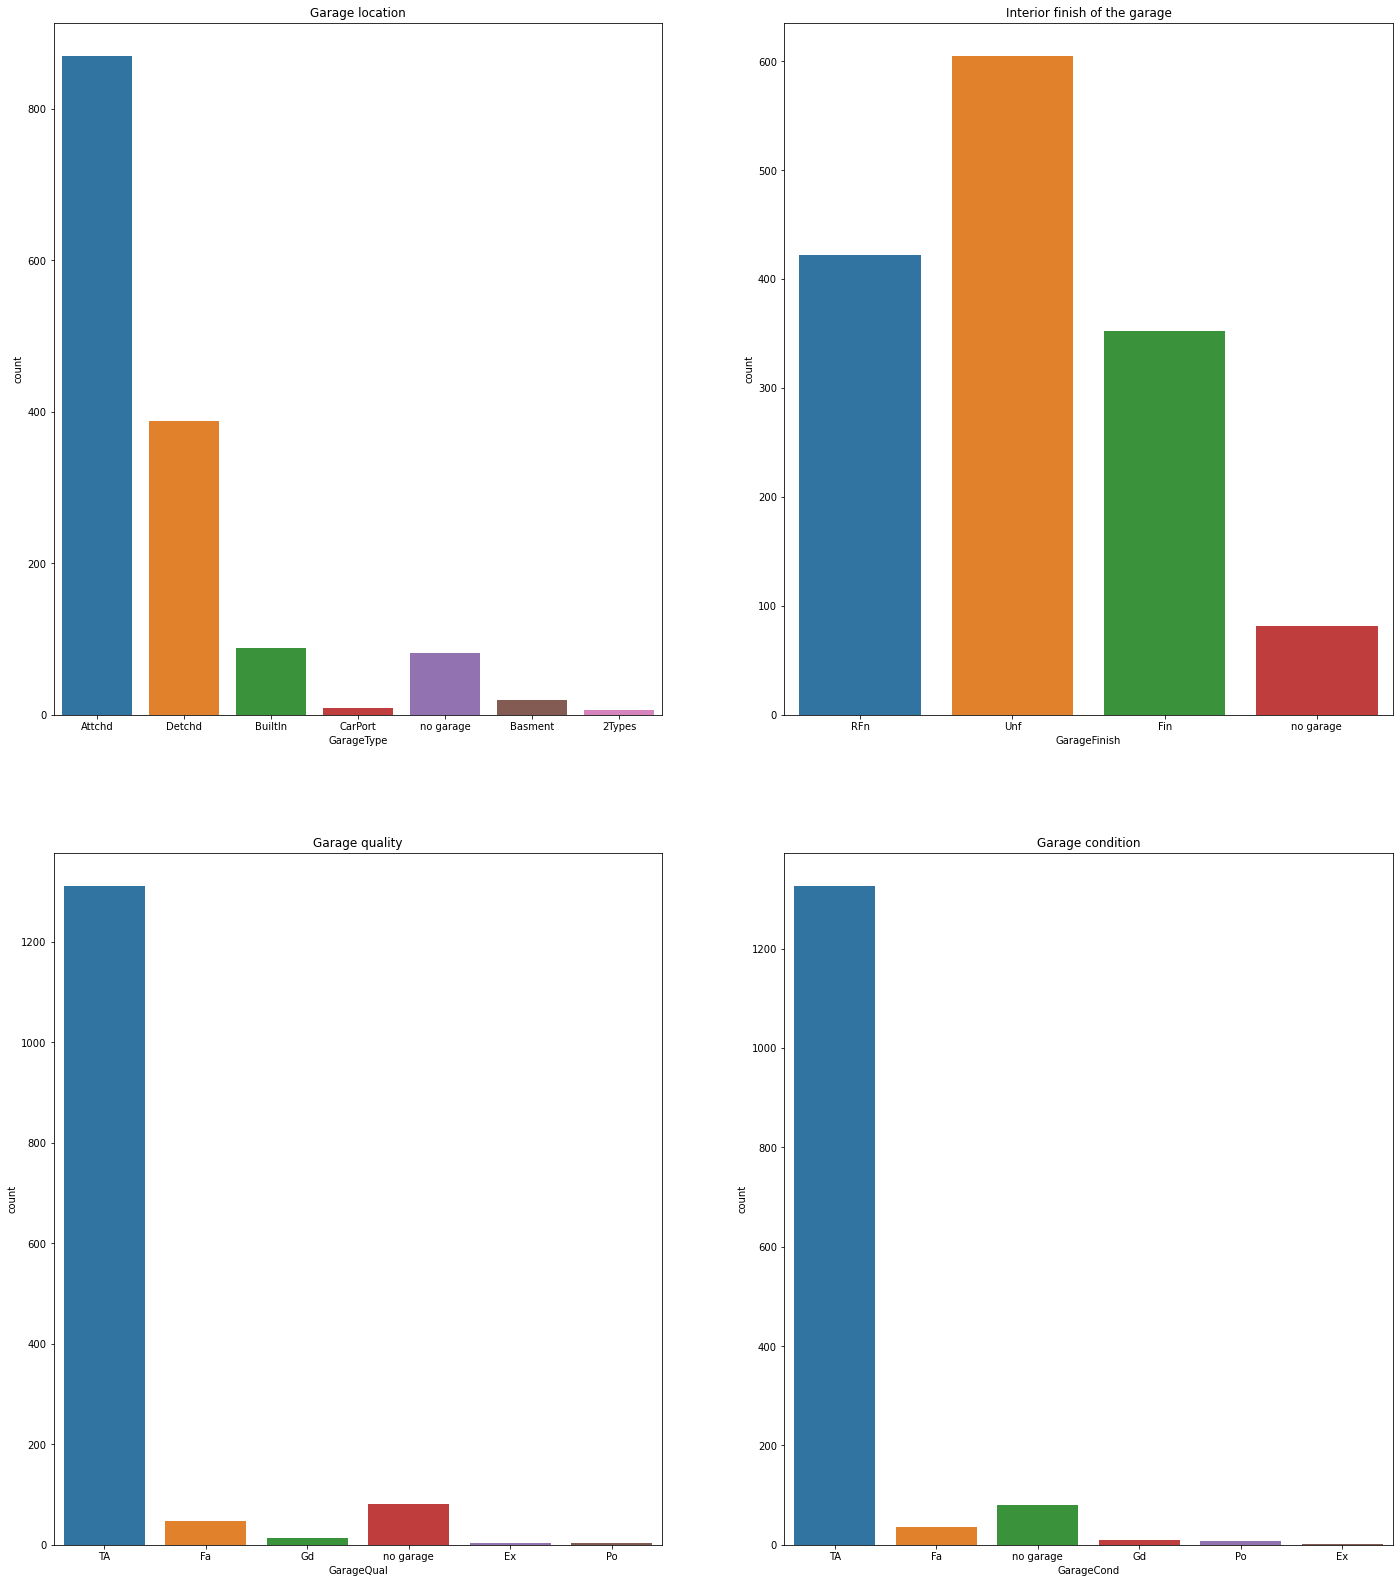

In [27]:
plt.figure(figsize = (24,28))

plt.subplot(2,2,1)
sns.countplot(house_price['GarageType'])
plt.title('Garage location')

plt.subplot(2,2,2)
sns.countplot(house_price['GarageFinish'])
plt.title('Interior finish of the garage')

plt.subplot(2,2,3)
sns.countplot(house_price['GarageQual'])
plt.title('Garage quality')

plt.subplot(2,2,4)
sns.countplot(house_price['GarageCond'])
plt.title('Garage condition')

plt.show()

In [28]:
house_price.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
no basement     37
Fa              35
Name: BsmtQual, dtype: int64

### Deriving the feature 'Age' from the yearBuilt column.

In [29]:
#Getting the age of the houses
import datetime as dt

house_price['CurrentYear'] = dt.datetime.now().year
house_price["Age"] = house_price['CurrentYear'] - house_price['YearBuilt']
house_price.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

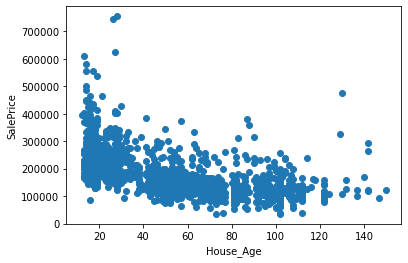

In [30]:
plt.scatter(x=house_price['Age'], y=house_price['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

In [31]:
# Removing the other not needed year columns from the dataframe.
house_price.drop(['YearRemodAdd','GarageYrBlt','YrSold'], axis =1, inplace = True)

In [32]:
# missing values > 0.00%
round(100*(house_price.isnull().sum())/len(house_price), 2)[round(100*(house_price.isnull().sum())/len(house_price), 2)>0]

Series([], dtype: float64)

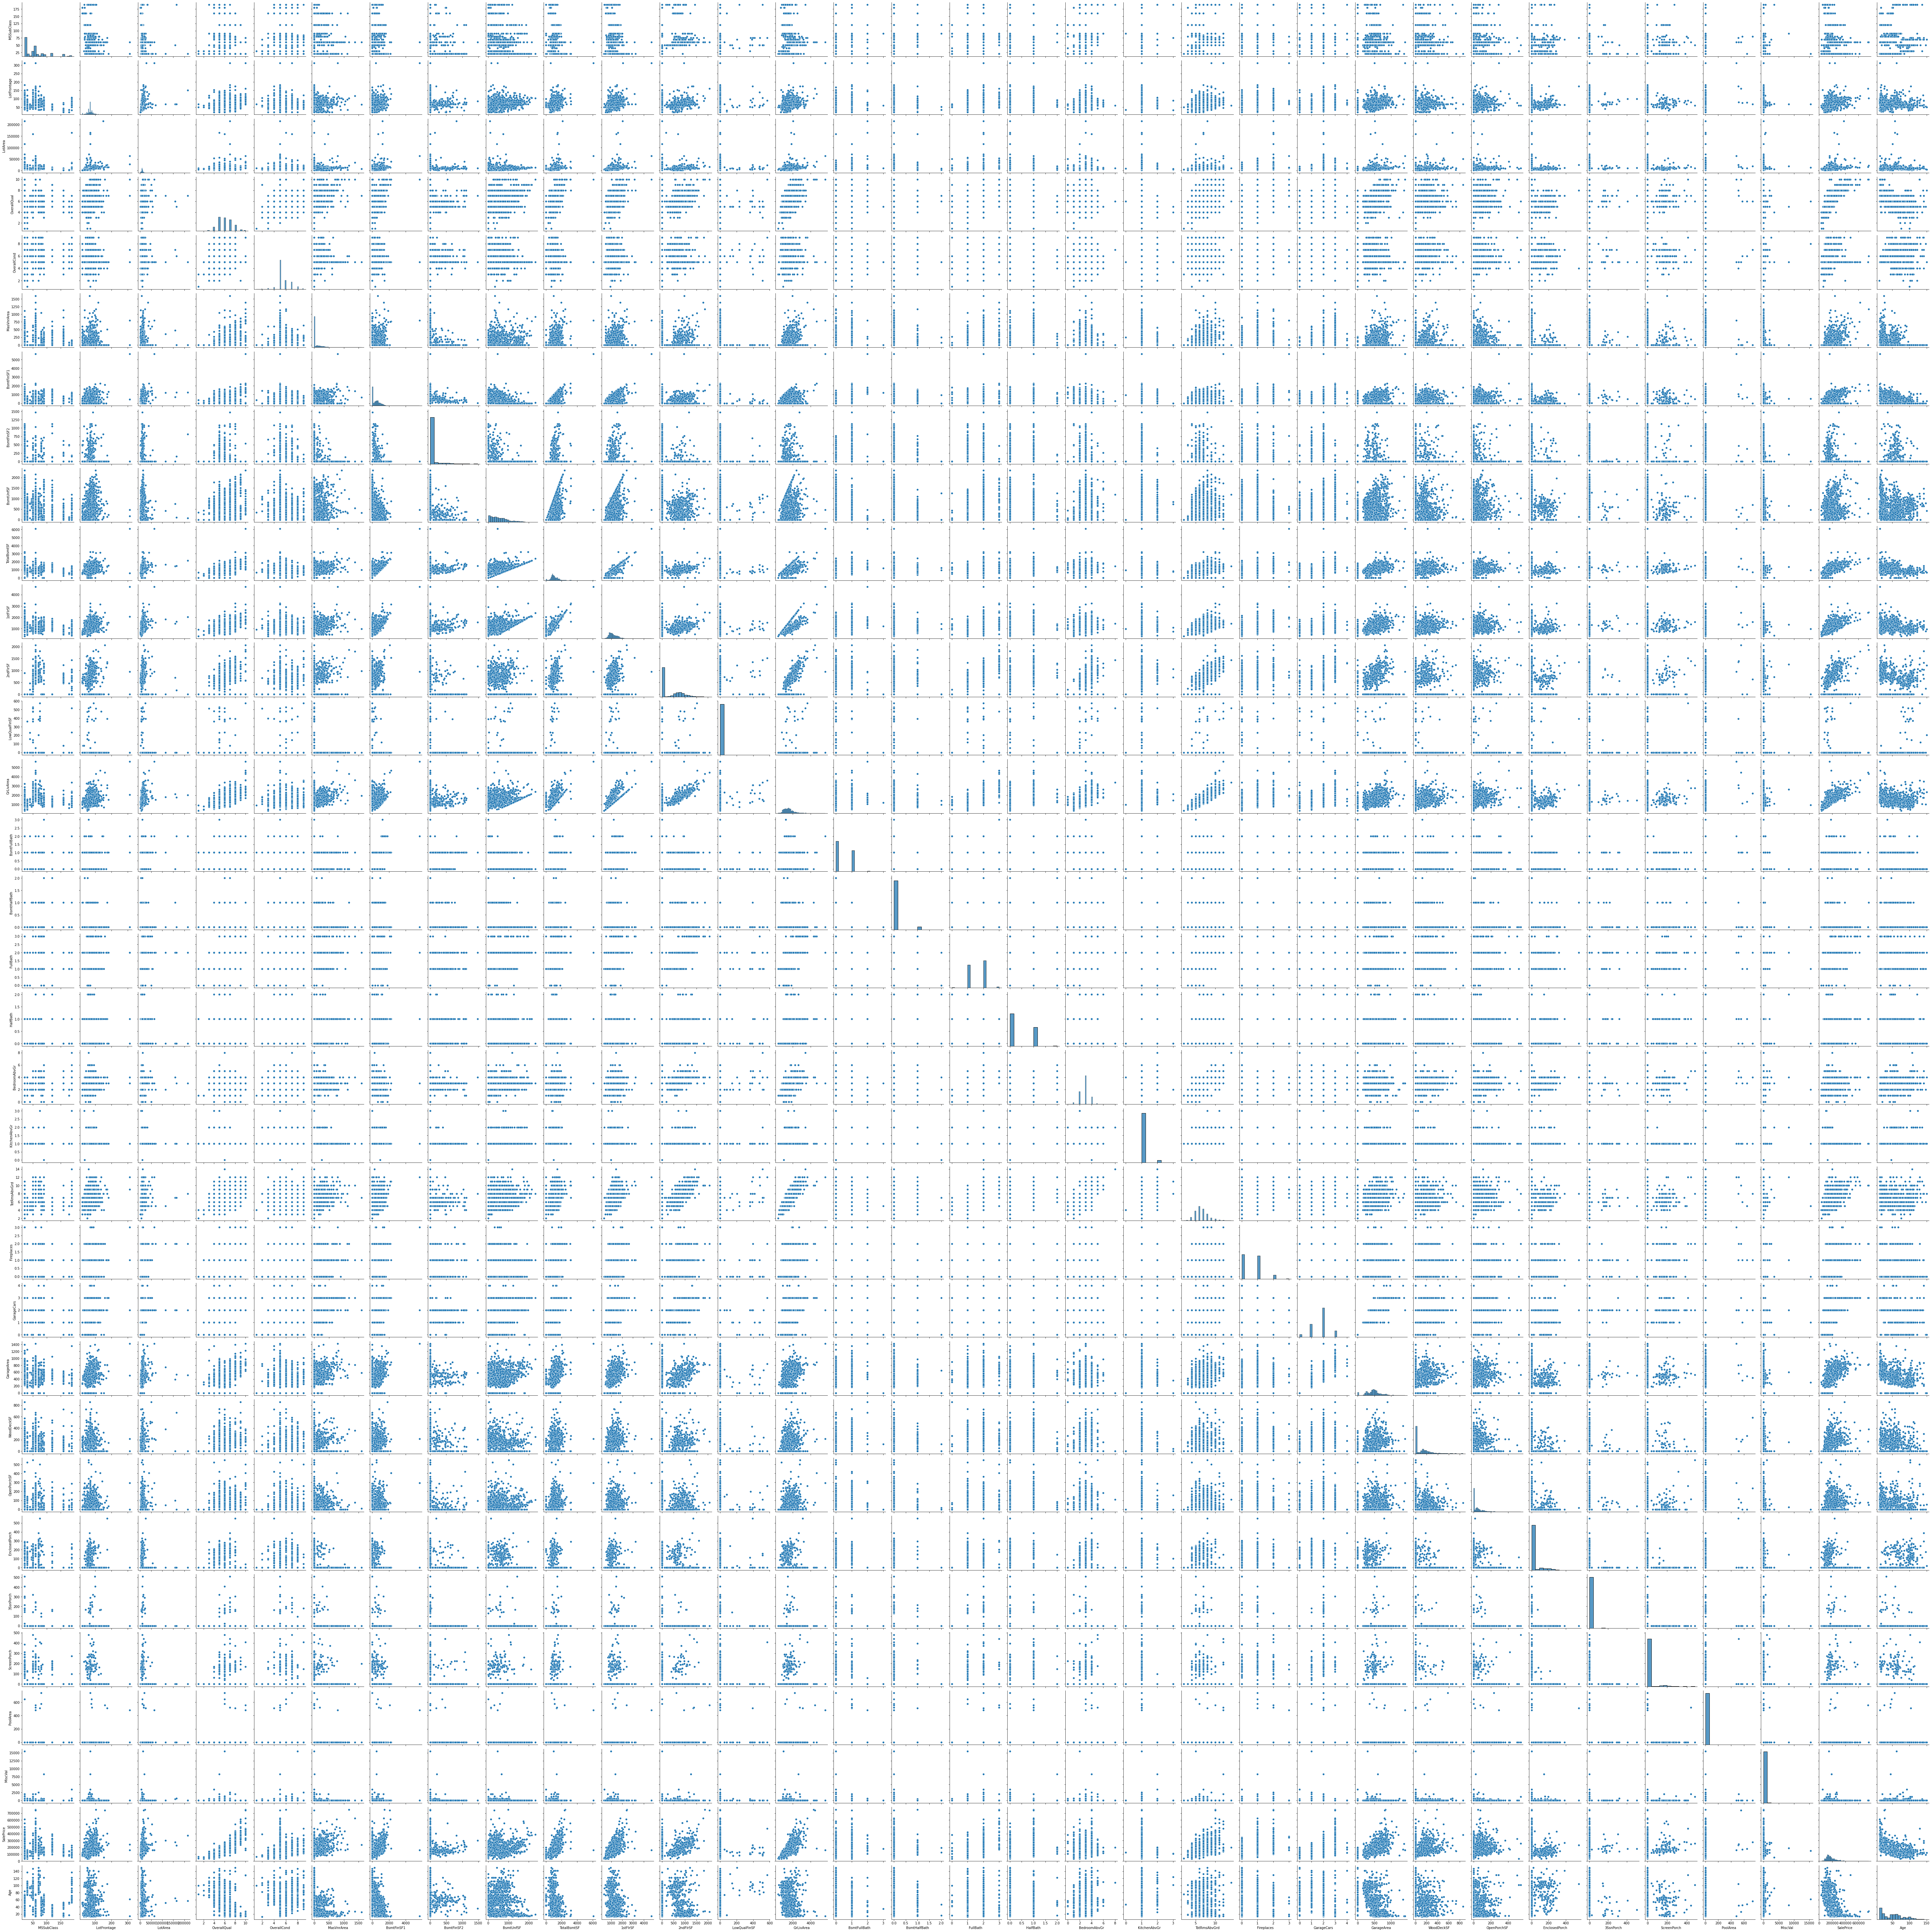

In [33]:
# Pairplot of all numeric columns
sns.pairplot(house_price)

<AxesSubplot:>

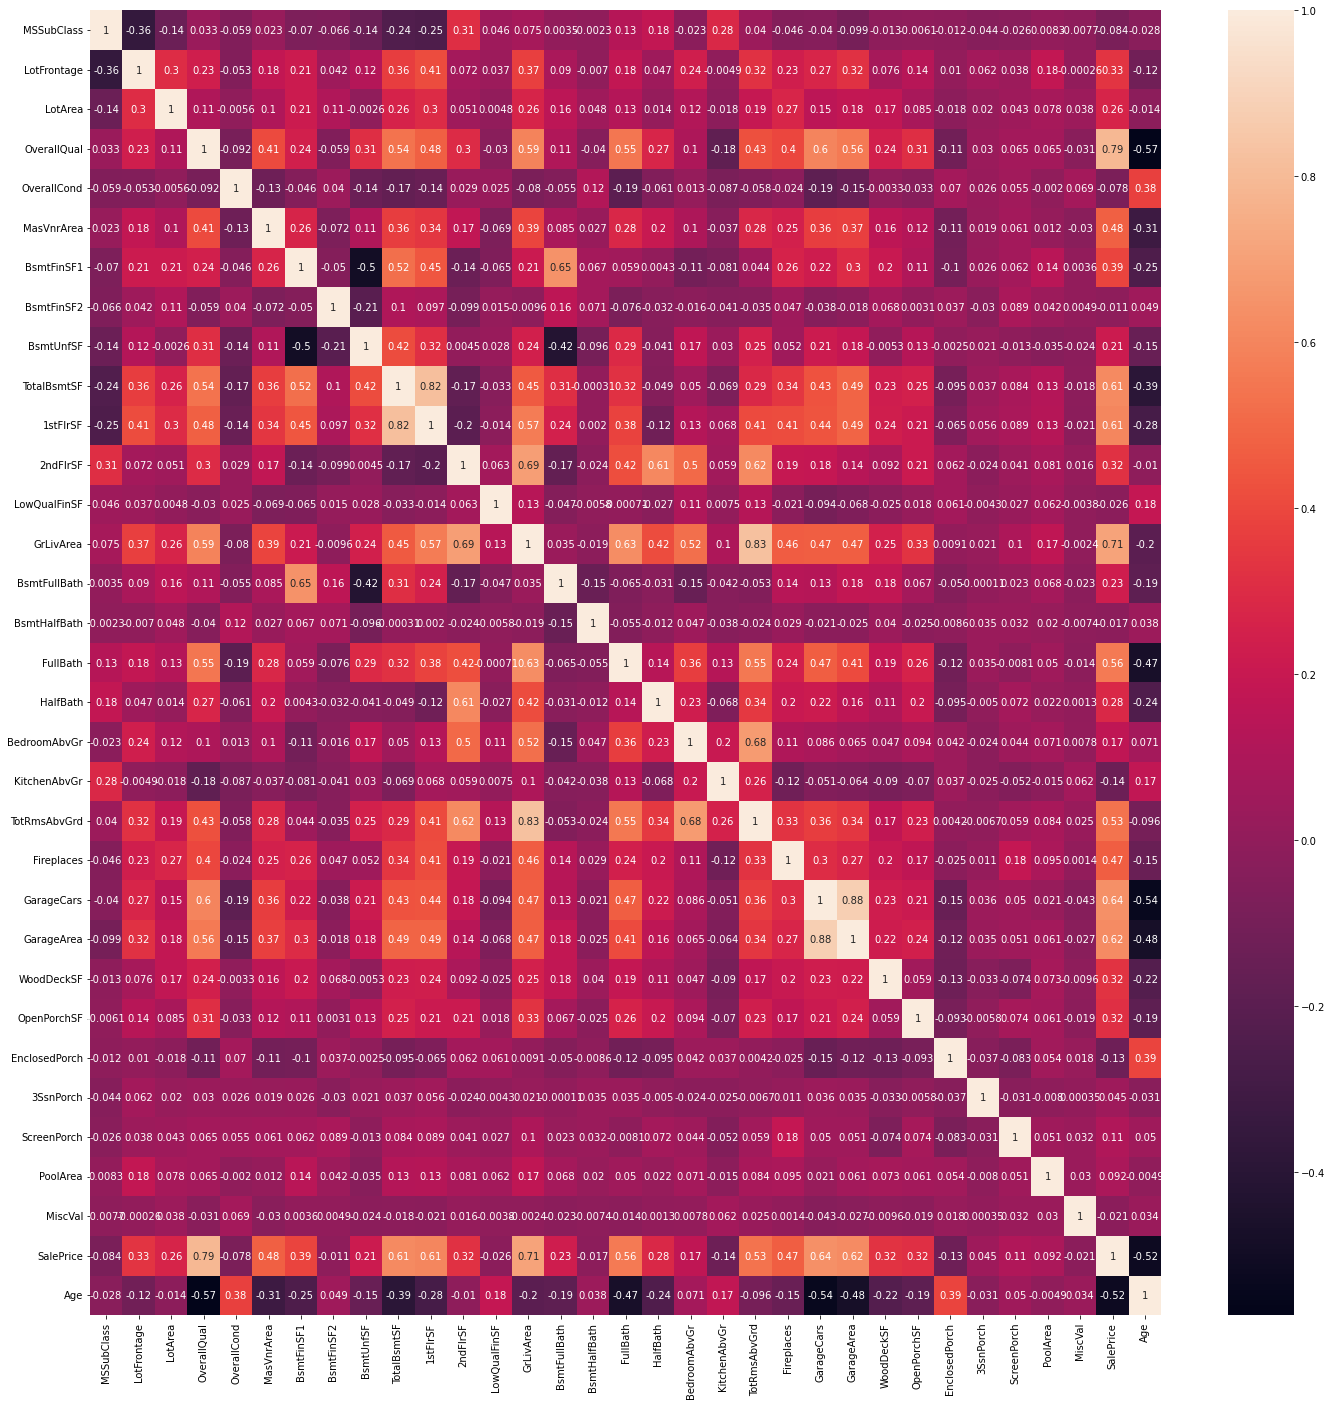

In [34]:
# Plotting Heatmap to get correlation between independent features
plt.figure(figsize=(24, 24))
sns.heatmap(house_price.corr(), annot = True)

#### Dropping columns '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea' as they have high correlation coefficients.

In [35]:
house_price.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1, inplace = True)

In [36]:
#regenerating list of numerical and non-numerical columns
NonNumCols_1 = []
NumCols_1 = []

for col in list(house_price):
    if house_price[col].dtypes == 'object':
        NonNumCols_1.append(col)  
    else:
        NumCols_1.append(col)
print('Non-Numerical columns:\n',NonNumCols_1)

print('Numerical columns:\n',NumCols_1)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age']


### Creating and joining dummy column with the actual dataset

In [37]:
# Copying the original dataset before dummy creation to another new dataframe
house_price_new = house_price.copy()

In [38]:
dummy_col = pd.get_dummies(house_price[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                                        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
                                        'SaleType', 'SaleCondition']],drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                                        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
                                        'SaleType', 'SaleCondition'],axis= 1)

### Let us check the distribution of our target variable before scaling and Splitting

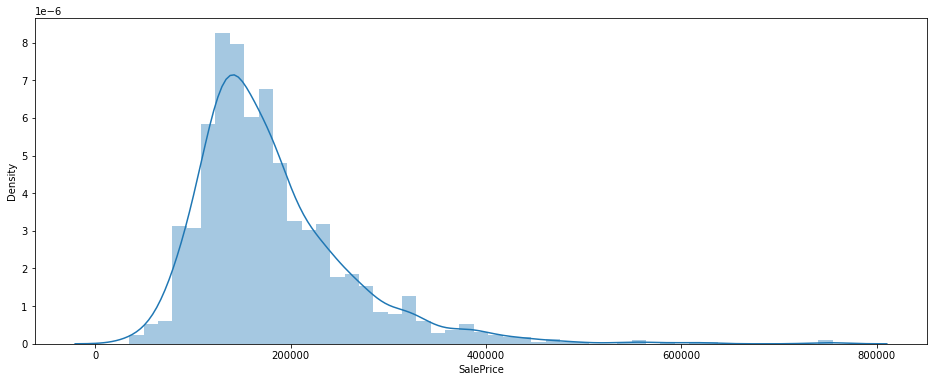

In [39]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

#### As we can clearly see the distribution for the target variable is not proper Normally distribution, as it is right skewed a little, may be because of the presence of some outliers. Hence, we will go for the data transformation technique for the target variable.

In [40]:
# We will use log transformation.
house_price["SalePrice_log"] = np.log(house_price["SalePrice"])

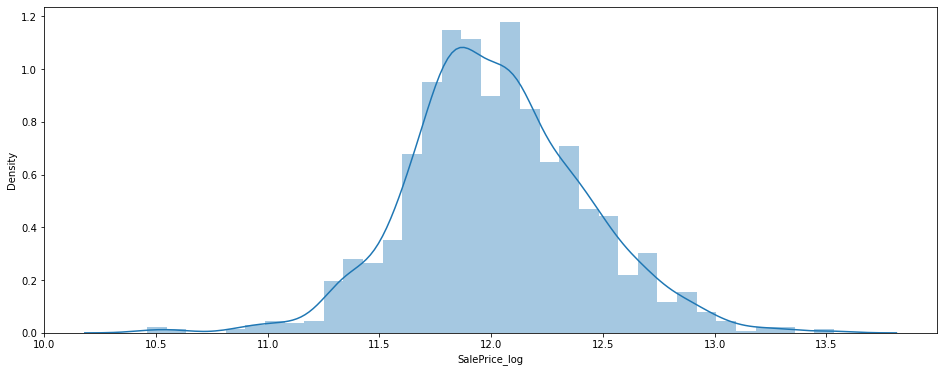

In [41]:
plt.figure(figsize=(16,6))
sns.distplot(house_price["SalePrice_log"])
plt.show()

#### We can see the distribution plot  seems lot better than it was without data transformation.

In [50]:
house_price.shape

(1460, 237)

In [51]:
# Copying dataframe to another for future use
house_price_1 = house_price.copy()

## Train-Test Split

In [52]:
# Importing other necessary libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [53]:
X = house_price_1.drop(['SalePrice_log','SalePrice'], axis=1)
y = house_price_1['SalePrice_log']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 235)
X_test Shape: (438, 235)
y_train Shape: (1021,)
y_test Shape: (438,)


## Feature Scalling

In [60]:
scaler = StandardScaler()

In [61]:
# Columns with numeric values
NumCols_n1 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
                    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
                    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                    'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice', 'Age']

In [62]:
#Scaling the numerical columns
NumCols1 = NumCols_n1.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.657071    -0.115302 -0.473765    -0.779861     0.383154   -0.560537   
318     0.035976     0.926898 -0.056845     0.649651    -0.533005    0.807462   
239    -0.195040    -0.794998 -0.169324    -0.065105    -1.449164   -0.560537   
986    -0.195040    -0.477806 -0.502297    -0.065105     2.215472   -0.560537   
1416    3.039179    -0.432493  0.082905    -1.494617     0.383154   -0.560537   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
210     0.043512   -0.293313  -0.374367    -0.430911  ...               0   
318     1.160345   -0.293313  -0.454644     0.621579  ...               0   
239    -0.761296   -0.293313   0.171964    -0.712011  ...               0   
986    -0.963574   -0.293313  -0.175904    -1.256778  ...               0   
1416   -0.963574   -0.293313   0.475233    -0.620490  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                       0                     0                     0   
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
210                      1                      0  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  

[5 rows x 235 columns]

In [63]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436   -0.888086    -0.432493 -0.144189    -1.494617     0.383154   -0.560537   
57      0.035976     0.881585  0.112505     0.649651    -0.533005   -0.560537   
780    -0.888086    -0.296554 -0.253368     0.649651    -0.533005   -0.357475   
382     0.035976     0.428455 -0.120412     0.649651    -0.533005   -0.560537   
1170    0.498007     0.292515 -0.058786    -0.065105     0.383154   -0.560537   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
1436    0.361992   -0.293313  -0.704396    -0.430911  ...               0   
57     -0.963574   -0.293313   0.660317    -0.439628  ...               0   
780    -0.963574   -0.293313   1.500998     0.381881  ...               0   
382    -0.963574   -0.293313   0.836481    -0.267481  ...               0   
1170    0.159714   -0.293313   0.022559     0.074633  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436               0             0             0            1   
57                 0             0             0            1   
780                0             0             0            1   
382                0             0             0            1   
1170               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                      0                     0                     0   
57                        0                     0                     0   
780                       0                     0                     0   
382                       0                     0                     0   
1170                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1436                     1                      0  
57                       1                      0  
780                      1                      0  
382                      1                      0  
1170                     1                      0  

[5 rows x 235 columns]

### Now using RFE lets try to to find the optimal number of feature

#### Note : I cannot use RFE with GridSearchCV as 235 variable with 5 folds will create 1175 fits and it will take more then 1 Hour to get the result so i am using RFE directly

In [64]:
len(X_train.columns)

235

In [65]:
# Creating Linear Regression object and running RFE with 50 variables as output.
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [66]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [67]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

### Lets filter the train and test set for the RFE selected columns

In [68]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Model Building and Evaluation

### Ridge Regression¶

In [69]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007585      0.007067         0.002104        0.003143      0.0001   
1       0.001604      0.003208         0.000000        0.000000       0.001   
2       0.000000      0.000000         0.003199        0.003918        0.01   
3       0.000000      0.000000         0.003134        0.006268        0.05   
4       0.003125      0.006250         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087559          -0.111666          -0.109706   
1   {'alpha': 0.001}          -0.087564          -0.111662          -0.109678   
2    {'alpha': 0.01}          -0.087674          -0.111624          -0.109523   
3    {'alpha': 0.05}          -0.088843          -0.111467          -0.110116   
4     {'alpha': 0.1}          -0.090165          -0.111292          -0.111025   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.112040  ...        -0.101864        0.011388                3   
1          -0.111882  ...        -0.101834        0.011346                2   
2          -0.110567  ...        -0.101673        0.010926                1   
3          -0.107635  ...        -0.101989        0.009620                4   
4          -0.106620  ...        -0.102637        0.008830                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.088890           -0.087310           -0.086828   
1           -0.088928           -0.087313           -0.086854   
2           -0.089348           -0.087340           -0.087186   
3           -0.091378           -0.087464           -0.089097   
4           -0.093304           -0.087621           -0.090790   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.087314           -0.088772         -0.087823         0.000843  
1           -0.087332           -0.088799         -0.087845         0.000850  
2           -0.087582           -0.089178         -0.088127         0.000938  
3           -0.089211           -0.091218         -0.089674         0.001464  
4           -0.090965           -0.093144         -0.091165         0.002061  

[5 rows x 21 columns]

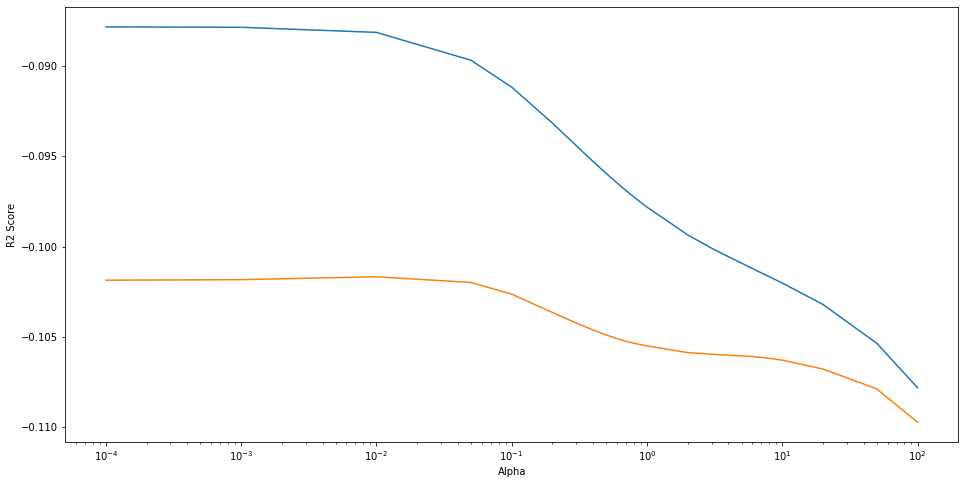

In [71]:
# Plotting R2 vs Alpha in case of Ridge regression
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [72]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.01}

In [73]:
# R2 values in case of Ridge regression
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9111349538612091
0.8387823469591408


In [74]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.11215988,  0.04414465,  0.05100406,  0.16682971, -0.06206152,
        0.40534604,  0.35756201,  0.38518084,  0.3048171 , -0.17944681,
        0.14187811,  0.06156952, -1.85600382, -0.19391482,  0.136392  ,
        2.77718446,  3.08168975,  2.87050464,  2.59206799,  2.90505576,
        2.73828838,  2.84472613, -0.07068645, -0.39022328, -0.06264692,
       -0.07068645, -0.06264692, -0.08117222, -0.02598971,  0.01476518,
        0.08148346,  0.01476518,  0.07877003,  0.15737372,  0.10491382,
       -0.50058763,  0.06855303, -0.02244821, -0.02244821, -0.03473576,
        0.1021711 ,  0.02436163,  0.01962954,  0.02400395,  0.02984675,
       -0.02244821,  0.12495352,  0.0864195 ,  0.07576596,  0.0864195 ])

In [75]:
#Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = pd.DataFrame(list(zip(cols, model_parameters)))
var_coeff.columns = ['Feature','Coef']

In [76]:
# Top 10 features by Ridge
var_coeff.sort_values(by='Coef',ascending=False).head(10)

Feature   Coef
0       constant  8.548
17      HalfBath  3.082
20    Fireplaces  2.905
18  BedroomAbvGr  2.871
22    WoodDeckSF  2.845
16      FullBath  2.777
21    GarageArea  2.738
19  KitchenAbvGr  2.592
6     MasVnrArea  0.405
8     BsmtFinSF2  0.385

### Lasso Regression

In [77]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005299      0.002943         0.000991        0.001983      0.0001   
1       0.003000      0.003688         0.000000        0.000000       0.001   
2       0.003202      0.003921         0.000000        0.000000        0.01   
3       0.000000      0.000000         0.003196        0.003914        0.05   
4       0.000000      0.000000         0.001694        0.003388         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087224          -0.111377          -0.109905   
1   {'alpha': 0.001}          -0.094750          -0.112502          -0.116678   
2    {'alpha': 0.01}          -0.107629          -0.125820          -0.122724   
3    {'alpha': 0.05}          -0.127327          -0.139671          -0.137700   
4     {'alpha': 0.1}          -0.161461          -0.172549          -0.164170   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.108094  ...        -0.101602        0.010170                1   
1          -0.103953  ...        -0.106179        0.007692                2   
2          -0.113754  ...        -0.117803        0.006482                3   
3          -0.133542  ...        -0.135032        0.004331                4   
4          -0.163986  ...        -0.166066        0.003888                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.091483           -0.088261           -0.088852   
1           -0.106321           -0.092167           -0.100191   
2           -0.121274           -0.107147           -0.114822   
3           -0.138053           -0.124652           -0.132731   
4           -0.166968           -0.160022           -0.163807   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.089414           -0.091389         -0.089880         0.001322  
1           -0.103358           -0.104918         -0.101391         0.005042  
2           -0.119497           -0.118689         -0.116286         0.005032  
3           -0.136499           -0.138182         -0.134024         0.005082  
4           -0.165171           -0.169423         -0.165078         0.003151  

[5 rows x 21 columns]

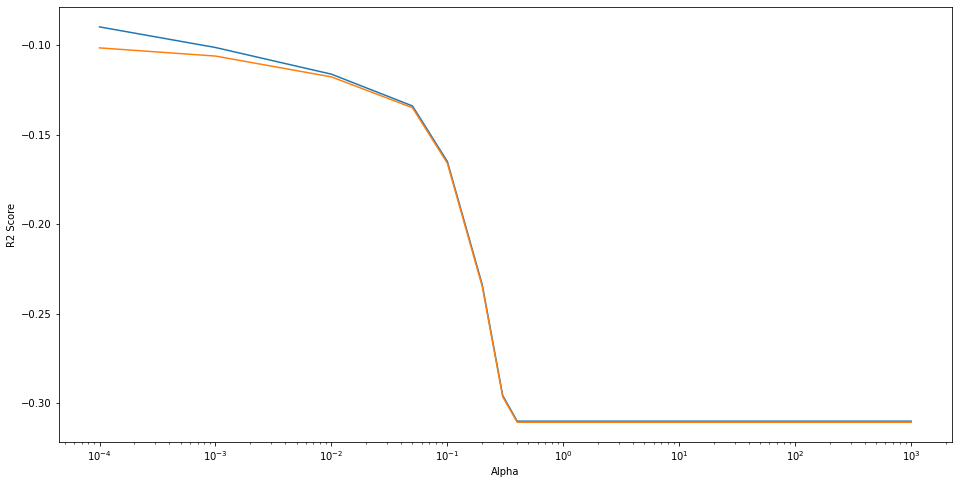

In [79]:
# Plotting R2 vs Alpha in case of Lasso regression.
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [80]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [81]:
# R2 values in case of Lasso regression.
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9060514775512855
0.8468613952468165


In [82]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [83]:
lasso.coef_

array([ 1.17477884e-01,  3.80735276e-02,  4.28992757e-02,  1.61426282e-01,
       -6.37679481e-02,  3.37763263e-01,  2.92112405e-01,  3.24680430e-01,
        2.39071257e-01, -1.80685984e-01,  1.43168613e-01,  6.79850089e-02,
       -1.69476581e+00, -7.31086666e-02,  3.18524039e-02,  2.07625527e+00,
        2.29391008e+00,  2.08752377e+00,  1.82156208e+00,  2.15559776e+00,
        2.02298361e+00,  2.13874170e+00, -2.07272099e-02, -3.14372976e-01,
       -2.04204020e-02, -6.36437602e-04, -8.46175064e-11, -7.80245787e-02,
       -2.50611426e-02,  0.00000000e+00,  8.91285669e-02,  0.00000000e+00,
        4.71814569e-02,  1.25382278e-01,  1.11152149e-01, -3.56494485e-01,
        6.21966190e-02, -8.60394092e-02, -0.00000000e+00, -3.05203729e-02,
        9.21997118e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.29354061e-02, -0.00000000e+00,  7.60551271e-02,  9.47514663e-02,
        7.46510664e-02,  6.68765664e-02])

In [84]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = pd.DataFrame(list(zip(cols, model_parameters)))
var_coeff.columns = ['Feature','Coef']

In [85]:
# Top 10 features by Lasso
var_coeff.sort_values(by='Coef',ascending=False).head(10)

Feature   Coef
0       constant  9.359
17      HalfBath  2.294
20    Fireplaces  2.156
22    WoodDeckSF  2.139
18  BedroomAbvGr  2.088
16      FullBath  2.076
21    GarageArea  2.023
19  KitchenAbvGr  1.822
6     MasVnrArea  0.338
8     BsmtFinSF2  0.325

In [86]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

Error distribution in train dataset


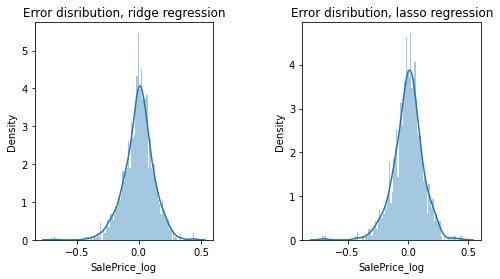

In [87]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [88]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9111349538612091
r2_score for lasso: 0.9060514775512855


In [89]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


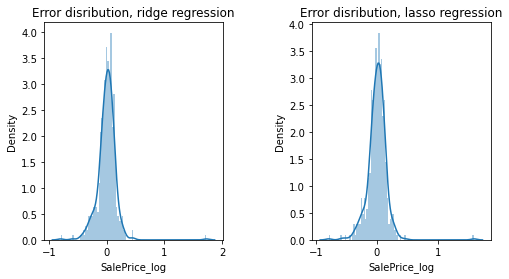

In [90]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [91]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.91
r2_score for lasso: 0.91
r2_score in test dataset:
r2_score for ridge: 0.84
r2_score for lasso: 0.85


## Conclusion

### The Top features in case of Ridge regression are : 
BsmtHalfBath, BedroomAbvGr, FullBath, Fireplaces, BsmtFullBath, KitchenAbvGr, HalfBath, BsmtUnfSF, BsmtFinSF1

### The Top features in case of Ridge regression are : 
BsmtHalfBath, BedroomAbvGr, BsmtFullBath, Fireplaces, FullBath, KitchenAbvGr, HalfBath, BsmtUnfSF, BsmtFinSF1


1. Optimum value for lambda in ridge regression is 0.01
2. Optimum value for lambda in lasso regression is 0.0001
3. **Value of r2_score in train dataset**:                                                                
    r2_score for ridge is around: 0.91                                                                                        
    r2_score for lasso is around: 0.91
4. **Value of r2_score in test dataset**:                                                         
    r2_score for ridge is around: 0.84                                                   
    r2_score for lasso is around: 0.85                                                     